In [1]:
# RANDOM FOREST REGRESSION #
"""
Runing a Random Forest Regression (RFR) on the Cali Housing Dataset,  using a GridSearch Cross Validation
"""

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)

# Convert the dataset into a DataFrame
df = data.frame

# Display the first few rows of the dataset
df.shape
df.head()
df.info()

(20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Check for missing values
df.isnull().sum()

# Basic summary of the dataset
df.describe()

# Since the dataset does not have missing values, no imputation is required.
# However, let's check for duplicates just in case.
df.duplicated().sum()

# Remove duplicates if any exist
#df = df.drop_duplicates()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


0

In [5]:
# Separate features (X) and the target variable (y)
X = df.drop(columns=["MedHouseVal"])  # 'MedHouseVal' is the target variable
y = df["MedHouseVal"]

X.shape, y.shape

((20640, 8), (20640,))

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , random_state=27
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [9]:
# Initialize the Random Forest Regressor with default parameters
base_model = RandomForestRegressor(
    random_state=27)

# Fit the model to the training data
base_model.fit(X_train, y_train)

# Predict on the test set
y_pred = base_model.predict(X_test)

# Evaluate the baseline model
print("Baseline Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RandomForestRegressor(random_state=27)

Baseline Model Performance:
Mean Squared Error: 0.25770058524870515
Mean Absolute Error: 0.32824328023255833
Root Mean Squared Error: 0.5076421822984228
R^2 Score: 0.8045540637126303


In [14]:
# (np.sqrt(mean_squared_error(y_test, y_pred)))/y_test.mean()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse
rmse
rmse / np.mean(y_test)

0.25770058524870515

0.5076421822984228

0.24540905520957523

In [17]:
base_model.

<bound method RegressorMixin.score of RandomForestRegressor(random_state=27)>

In [16]:
# Define the parameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300]  # Number of trees
    , "max_depth": [None, 10, 20, 30]  # Maximum depth of trees
    , "min_samples_split": [2, 5, 10]  # Minimum samples required to split a node
    , "min_samples_leaf": [1, 2, 4]     # Minimum samples in a leaf node
} 

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_model
    , param_grid=param_grid
    , cv=3  # 3-fold cross-validation
    , scoring="neg_mean_squared_error"
    , n_jobs=-1 # This will leverage ALL machine cores; (normally I dont but RFR is computationally expensive!)
)
# Note: These params will result in approx 324 iterations; hence, the 'n_jobs=-1' to force all cores is ideal.

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.26569017922538246


In [18]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_best_pred = best_model.predict(X_test)

# Evaluate the best model
print("Tuned Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_best_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_best_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_best_pred))
print("R^2 Score:", r2_score(y_test, y_best_pred))

Tuned Model Performance:
Mean Squared Error: 0.25670091191575606
Root Mean Squared Error: 0.5066566015712773
Mean Absolute Error: 0.3278971538678944
R^2 Score: 0.8053122385159632


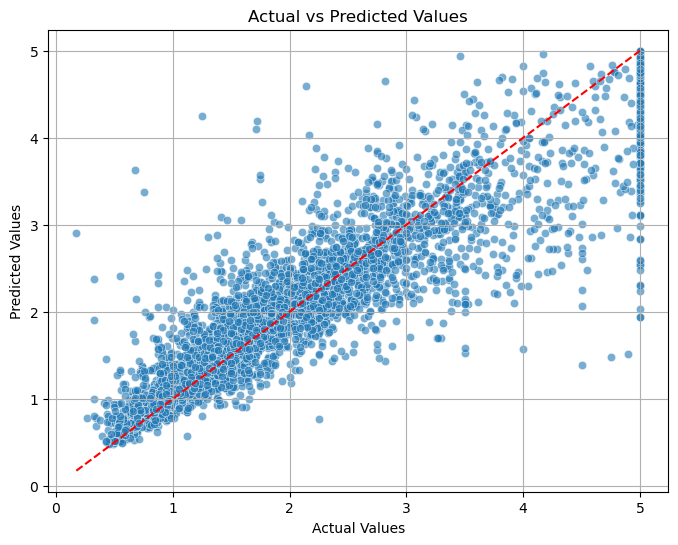

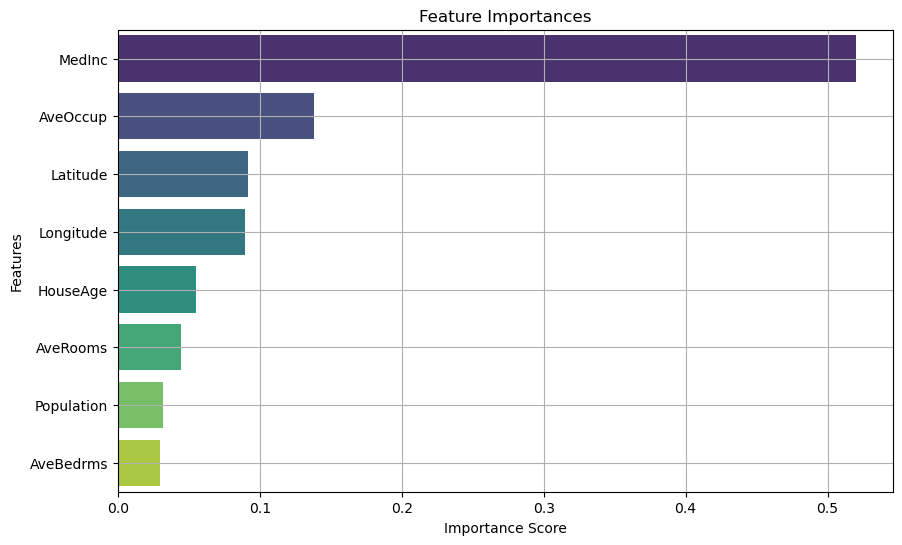

In [19]:
# Plot a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=y_test, y=y_best_pred, alpha=0.6
)

plt.plot(
    [y_test.min(), y_test.max()]
    , [y_test.min(), y_test.max()]
    , color='red'
    , linestyle='--'
)

plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

# Plot feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns
    , "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance", y="Feature"
    , data=feature_importances
    , palette="viridis"
)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid()
plt.show();